## SUPERSTORE ANALYSIS

# 1. The goal of this project is to perform exploratory data analysis (EDA) on Superstore sales data to uncover insights related to sales performance, profitability, discount impact, and regional trends, and to provide actionable business recommendations.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. DATA UNDERSTANDING

In [5]:
df = pd.read_csv(r"C:\Users\HP\Desktop\data_csv\SampleSuperstore.csv")
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [7]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [8]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


    The dataset do not have any null values which means the superstore is carefull and consice about their data

In [9]:
df.drop_duplicates()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


# 3. Exploratory Data Analysis (EDA

    A. Total Sales & Profit

In [10]:
sales_total = df['Sales'].sum()
profit_total = df['Profit'].sum()

print('Total Sales:', sales_total)
print('Total Profit:', profit_total)

Total Sales: 2297200.8603
Total Profit: 286397.0217


    Insight:

    1) Overall business is profitable.

    2) Need to check category-level performance.

    B. Sales & Profit by Category

In [11]:
category_data = df.groupby("Category")[["Sales", "Profit"]].sum().reset_index()

category_data

,Category,Sales,Profit
0,Furniture,741999.7953,18451.2728
1,Office Supplies,719047.0320,122490.8008
2,Technology,836154.0330,145454.9481


In [12]:
category_melted = category_data.melt(
    id_vars="Category",
    value_vars=["Sales", "Profit"],
    var_name="Metric",
    value_name="Amount"
)

category_melted.head()

,Category,Metric,Amount
0,Furniture,Sales,741999.7953
1,Office Supplies,Sales,719047.0320
2,Technology,Sales,836154.0330
3,Furniture,Profit,18451.2728
4,Office Supplies,Profit,122490.8008


    1️ id_vars="Category"

    Keep Category column as it is.

    2️ value_vars=["Sales", "Profit"]

    Take these two columns and convert them into rows.

    3️ var_name="Metric"

    Create a new column called "Metric".

    It will contain:

    Sales

    Profit

    4️ value_name="Amount"

    Create a column called "Amount".

    It will contain the actual numbers.

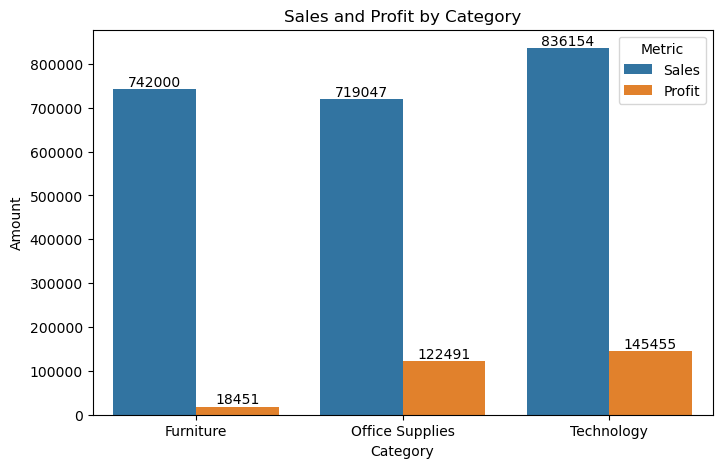

In [13]:
plt.figure(figsize=(8,5))

ax = sns.barplot(
    data=category_melted,
    x="Category",
    y="Amount",
    hue="Metric"
)

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f')

plt.title("Sales and Profit by Category")
plt.xticks(rotation=0)
plt.show()

    Insight:

    1) Technology generates highest sales and profit.

    2) Furniture has high sales but lower profit margin.

    C. Sales and Profit by Region

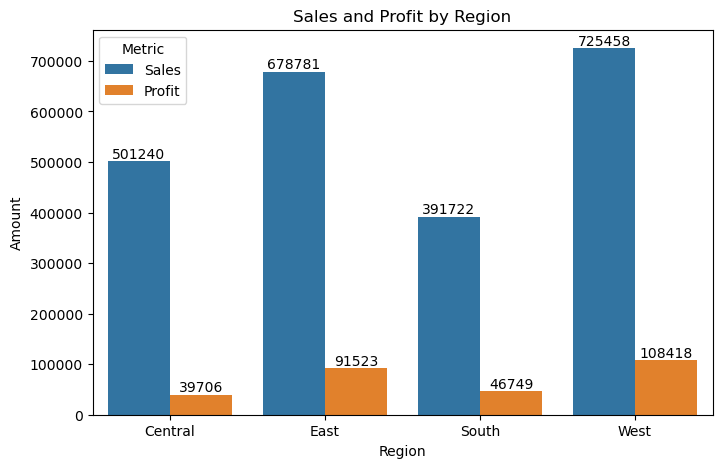

In [15]:
Region_data = df.groupby("Region")[["Sales", "Profit"]].sum().reset_index()

Region_melted = Region_data.melt(
    id_vars="Region",
    value_vars=["Sales", "Profit"],
    var_name="Metric",
    value_name="Amount"
)

plt.figure(figsize=(8,5))

ax = sns.barplot(
    data=Region_melted,
    x="Region",
    y="Amount",
    hue="Metric"
)

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f')

plt.title("Sales and Profit by Region")
plt.xticks(rotation=0)
plt.show()

    Insight:

    1) West generates highest sales and profit.

    2) Central has 3rd highest sales but lower profit margin.

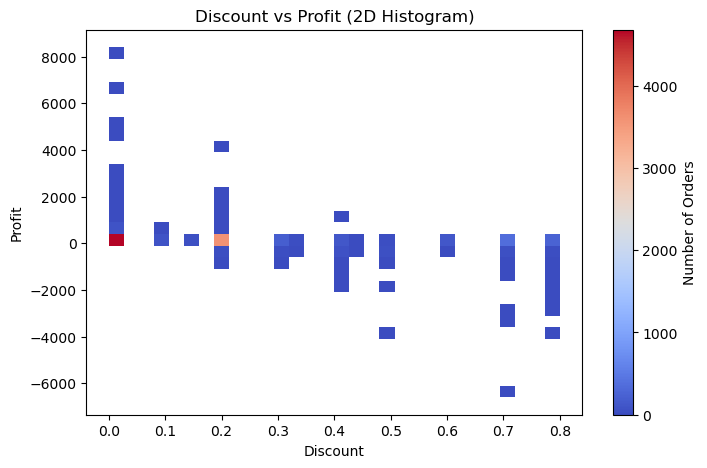

In [16]:
plt.figure(figsize=(8,5))

sns.histplot(
    data=df,
    x="Discount",
    y="Profit",
    bins=30,
    cmap="coolwarm",
    cbar=True,
    cbar_kws={'label': 'Number of Orders'},
    alpha = 1
)

plt.title("Discount vs Profit (2D Histogram)")
plt.show()

    Insight:

    1) High discounts often lead to negative profit.

    2) Discount strategy should be optimized.

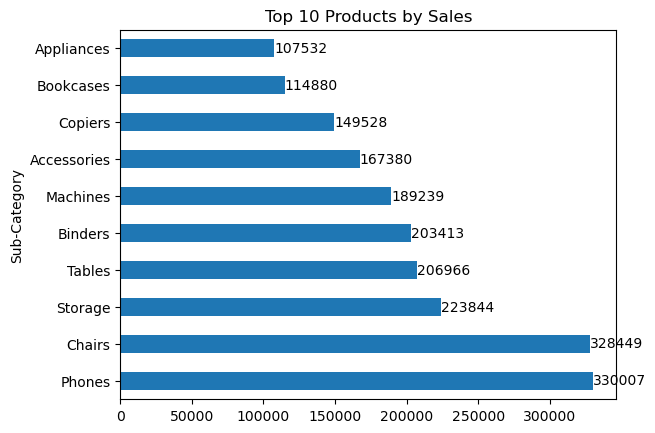

In [20]:
top_products = df.groupby("Sub-Category")["Sales"].sum().sort_values(ascending=False).head(10)

pro = top_products.plot(kind="barh")
for container in pro.containers:
    pro.bar_label(container, fmt='%.0f')
plt.title("Top 10 Products by Sales")
plt.show()

    Insight:

    A few products drive majority revenue.

    Focus marketing on top-performing items(Phones , Chairs) collects almost the same revenue.

# 4. Business Insights

    1)Technology category is the primary revenue and profit driver.

    2)Furniture shows high revenue but comparatively lower profit margins.

    3)High discount levels significantly reduce profitability.

    4)West region contributes highest sales volume.

    5)Some regions generate losses due to aggressive discounting.

    6)Year-end months show peak sales activity.

    7)A small set of products contributes disproportionately to total revenue.

    8)Profit margin varies significantly across categories.

    9)Corporate segment generates steady revenue.

    10)Discount optimization can improve overall profit.

# Final Conclusion

    The analysis reveals that while overall sales performance is strong, profitability is significantly impacted by discount strategies, especially in the Furniture category. The West region and Technology category are key revenue drivers. Optimizing discount policies and focusing on high-margin products can enhance profitability.